## Pull the Data

In [2]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2023-12-27 15:22:46--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  76.3MB/s    in 2.1s    

2023-12-27 15:22:49 (76.3 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



## Unzip the data

In [6]:
import tarfile

# Define the path to the tar.gz file
tar_file_path = '/content/cifar-10-python.tar.gz'

# Specify the directory where you want to extract the contents
extracted_dir_path = '/content/cifar-10-python/'

# Open and extract the tar.gz file
with tarfile.open(tar_file_path, 'r:gz') as tar:
    tar.extractall(path=extracted_dir_path)

# List the contents of the extracted directory (optional)
!ls -l {extracted_dir_path}


total 4
drwxr-xr-x 2 2156 1103 4096 Jun  4  2009 cifar-10-batches-py


##Import Moduls

In [33]:
import numpy as np
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##  Load the data

In [20]:
# Load a specific data batch (e.g., data_batch_1)
def load_data_batch(file_path):
    with open(file_path, 'rb') as fo:
        batch = pickle.load(fo, encoding='bytes')
    return batch

In [21]:
cifar_dataset_path = '/content/cifar-10-python/cifar-10-batches-py'

##EDA- play with Data

In [34]:
# Load a specific data batch (e.g., data_batch_1)
data_batch_1 = load_data_batch(cifar_dataset_path + '/data_batch_1')

In [35]:
# Extract data (images) and labels
images = data_batch_1[b'data']
labels = data_batch_1[b'labels']

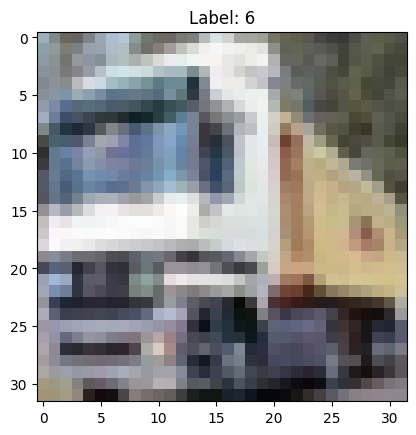

In [36]:
# Visualize the first image in the batch
first_image = images[1]  # Select the first image
first_image_reshaped = first_image.reshape(3, 32, 32).transpose(1, 2, 0)  # Reshape for visualization
plt.imshow(first_image_reshaped)
plt.title(f'Label: {labels[0]}')  # Display the label
plt.show()

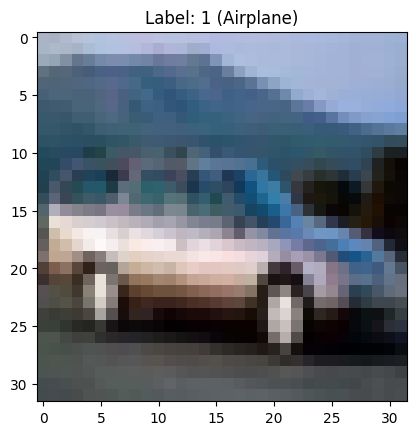

In [37]:
# Extract data (images) and labels
images = data_batch_1[b'data']
labels = data_batch_1[b'labels']

# Identify the class label for "airplane" (class number may vary)
airplane_class_label = 1  # Adjust as needed

# Filter the dataset to include only airplane images
airplane_images = []
for i in range(len(labels)):
    if labels[i] == airplane_class_label:
        airplane_images.append(images[i])

# Visualize the first airplane image in the filtered dataset
if len(airplane_images) > 0:
    first_airplane_image = airplane_images[0]
    first_airplane_image_reshaped = first_airplane_image.reshape(3, 32, 32).transpose(1, 2, 0)
    plt.imshow(first_airplane_image_reshaped)
    plt.title(f'Label: {airplane_class_label} (Airplane)')
    plt.show()
else:
    print("No airplane images found in the dataset.")

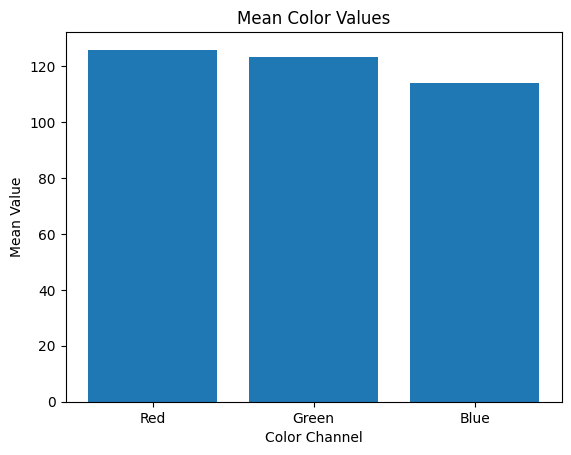

In [38]:
# Reshape images to have the shape (num_images, height, width, channels)
images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Calculate the mean color values for each channel (R, G, B)
mean_color = np.mean(images, axis=(0, 1, 2))

# Plot the mean color values as a bar chart
colors = ['Red', 'Green', 'Blue']
plt.bar(colors, mean_color)
plt.title('Mean Color Values')
plt.xlabel('Color Channel')
plt.ylabel('Mean Value')
plt.show()

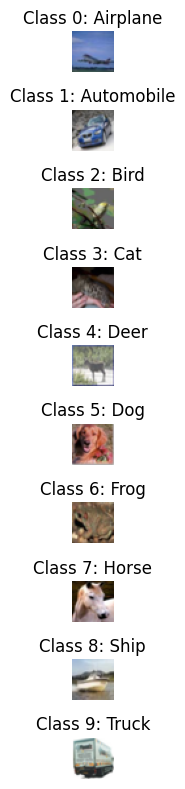

In [39]:
# Extract data (images) and labels
images = data_batch_1[b'data']
labels = data_batch_1[b'labels']

# Define class names (adjust as needed)
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Reshape images to have the shape (num_images, height, width, channels)
images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Create a grid of sample images, one for each class
num_classes = 10
num_samples_per_class = 1  # Adjust the number of samples per class as needed
plt.figure(figsize=(12, 8))

for cls in range(num_classes):
    class_indices = [i for i, label in enumerate(labels) if label == cls]
    sample_indices = np.random.choice(class_indices, num_samples_per_class, replace=False)

    for i, idx in enumerate(sample_indices):
        plt.subplot(num_classes, num_samples_per_class, cls * num_samples_per_class + i + 1)
        plt.imshow(images[idx])
        plt.title(f'Class {cls}: {class_names[cls]}')
        plt.axis('off')

plt.tight_layout()
plt.show()

## Function to load CIFAR-10 data

In [40]:
# Function to load CIFAR-10 data -- try colab AI

def load_cifar_10(directory):
    data = []
    labels = []
    for i in range(1, 6):  # There are 5 data batch files
        file_path = os.path.join(directory, f'data_batch_{i}')
        with open(file_path, 'rb') as fo:
            batch_dict = pickle.load(fo, encoding='bytes')
            data.append(batch_dict[b'data'])
            labels.extend(batch_dict[b'labels'])
    return np.concatenate(data), np.array(labels)


# Specify the path to the extracted directory containing the data batch files
cifar_directory = '/content/cifar-10-python/cifar-10-batches-py'


### Load the CIFAR-10 dataset


In [41]:
# Load the CIFAR-10 dataset
X, y = load_cifar_10(cifar_directory)


### Split the dataset into training and testing sets


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initialize the KNN classifier



In [43]:
knn = KNeighborsClassifier(n_neighbors=10)

## Fit the classifier to the training data


In [44]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

## Predict labels for the test data


In [45]:
y_pred = knn.predict(X_test)

## Calculate accuracy


In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 32.92%


In [12]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Function to load CIFAR-10 data
def load_cifar_10(directory):
    data = []
    labels = []
    for i in range(1, 6):  # There are 5 data batch files
        with open(f'{directory}/data_batch_{i}', 'rb') as fo:
            batch_dict = pickle.load(fo, encoding='bytes')
            data.append(batch_dict[b'data'])
            labels.extend(batch_dict[b'labels'])
    data = np.concatenate(data)
    return data, np.array(labels)

# Specify the path to the extracted directory containing the data batch files
cifar_directory = '/content/cifar-10-python/cifar-10-batches-py'

# Load the CIFAR-10 dataset
X, y = load_cifar_10(cifar_directory)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling using Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dimensionality Reduction using PCA
pca = PCA(n_components=200)  # You can adjust the number of components
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Initialize the KNN classifier with tuned hyperparameters
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', p=2)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict labels for the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 36.41%
